In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve
import sklearn.metrics as metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df1=pd.read_csv('newDi.csv')


In [5]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [6]:
df1.head()

,favourites_count,followers_count,statuses_count,friends_count,listed_count,geo_enabled,default_profile,profile_use_background_image,Is_Fake
0,265,208,2177,332,1,1.0,0.0,0.0,0
1,3972,330,2660,485,5,1.0,1.0,1.0,0
2,1185,166,1254,177,0,0.0,0.0,1.0,0
3,60304,2248,202968,981,101,1.0,0.0,1.0,0
4,5,21,82,79,0,0.0,1.0,1.0,0


In [7]:
df1.shape

(6825, 9)

In [8]:
X=df1.drop('Is_Fake',axis=1)

In [9]:
y=df1['Is_Fake']

In [10]:
cv=ShuffleSplit(n_splits=10,random_state=42,test_size=0.3)

In [11]:
cross_val_score(XGBClassifier(),X,y,scoring='accuracy',cv=cv)

array([0.99023438, 0.99316406, 0.99121094, 0.99072266, 0.99414062,
       0.9921875 , 0.99414062, 0.99072266, 0.99169922, 0.99169922])

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4777, 8)
(2048, 8)
(4777,)
(2048,)


In [14]:
xg=XGBClassifier()

In [15]:
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [16]:
prediction=xg.predict(x_test)

In [17]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1074
           1       0.99      0.99      0.99       974

    accuracy                           0.99      2048
   macro avg       0.99      0.99      0.99      2048
weighted avg       0.99      0.99      0.99      2048



In [18]:
confusion_matrix(y_test,prediction)

array([[1065,    9],
       [  11,  963]])

In [19]:
fpr, tpr, thresholds=roc_curve(y_test,prediction)

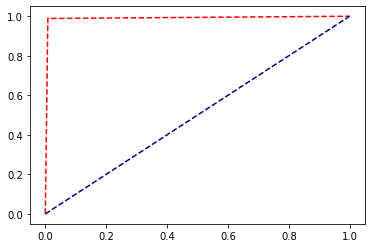

In [20]:
plt.plot(fpr,tpr,linestyle='--',color='red')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Loss: ",metrics.log_loss(y_test, prediction))

Accuracy: 0.990234375
Loss:  0.33729625208744496


In [22]:
import pickle

In [23]:
%cd Models
with open('xg_boost.pkl','wb') as f:
    pickle.dump(xg,f)

/content/drive/My Drive/project/Models
